1. Loading the Titanic Dataset

In [29]:
import pandas as pd
#Reading the file into a dataframe
PATH = r'C:\Users\Sumba\Downloads\D2_titanic_modified - D2_titanic_modified.csv'
data = pd.read_csv(PATH)
#Displaying the read contents
data

,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


2. Identifying the target:
2.1 --> who,embark_town

3. Identifying and excluding the features with missing values(deck)

In [30]:
X = data.drop("deck",axis=1) # target (/output variable) is excluded
X

,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


4. Fill the missing values for age

In [31]:
X['age'] = X.groupby('gender')['age'].transform(lambda x: x.fillna(x.mean()))


5. Drop the missing rows in embarked column

In [32]:
data = data.dropna(subset=['embarked'])

6. Features where binary encoding is to be done:
6.1 --> embarked,class,gender,who,adult_male,embark_town,alive,alone

adult_male, alive, alone, gender-->Dummy Variable Encoding
class --> Ordinal Encoding
embarked, embark_town, who --> One-Hot Encoding

In [33]:
X['gender']=X['gender'].replace('male',1)
X['gender']=X['gender'].replace('female',0)
X

C:\Users\Sumba\AppData\Local\Temp\ipykernel_23724\1723542005.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['gender']=X['gender'].replace('female',0)


,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,1,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,0,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,0,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,0,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,1,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,0,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,27.915709,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [34]:
X['adult_male'] = X['adult_male'].replace({True: 1, False: 0})
X

C:\Users\Sumba\AppData\Local\Temp\ipykernel_23724\1588192803.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['adult_male'] = X['adult_male'].replace({True: 1, False: 0})


,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,1,22.000000,1,0,7.2500,S,Third,man,1,Southampton,no,False
1,0,38.000000,1,0,71.2833,C,First,woman,0,Cherbourg,yes,False
2,0,26.000000,0,0,7.9250,S,Third,woman,0,Southampton,yes,True
3,0,35.000000,1,0,53.1000,S,First,woman,0,Southampton,yes,False
4,1,35.000000,0,0,8.0500,S,Third,man,1,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,S,Second,man,1,Southampton,no,True
887,0,19.000000,0,0,30.0000,S,First,woman,0,Southampton,yes,True
888,0,27.915709,1,2,23.4500,S,Third,woman,0,Southampton,no,False
889,1,26.000000,0,0,30.0000,C,First,man,1,Cherbourg,yes,True


In [35]:
X['alive']=X['alive'].replace('yes',1)
X['alive']=X['alive'].replace('no',0)
X

C:\Users\Sumba\AppData\Local\Temp\ipykernel_23724\209861220.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['alive']=X['alive'].replace('no',0)


,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,1,22.000000,1,0,7.2500,S,Third,man,1,Southampton,0,False
1,0,38.000000,1,0,71.2833,C,First,woman,0,Cherbourg,1,False
2,0,26.000000,0,0,7.9250,S,Third,woman,0,Southampton,1,True
3,0,35.000000,1,0,53.1000,S,First,woman,0,Southampton,1,False
4,1,35.000000,0,0,8.0500,S,Third,man,1,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,S,Second,man,1,Southampton,0,True
887,0,19.000000,0,0,30.0000,S,First,woman,0,Southampton,1,True
888,0,27.915709,1,2,23.4500,S,Third,woman,0,Southampton,0,False
889,1,26.000000,0,0,30.0000,C,First,man,1,Cherbourg,1,True


In [36]:
X['alone'] = X['alone'].replace({True: 1, False: 0})
X

C:\Users\Sumba\AppData\Local\Temp\ipykernel_23724\3047584570.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['alone'] = X['alone'].replace({True: 1, False: 0})


,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,1,22.000000,1,0,7.2500,S,Third,man,1,Southampton,0,0
1,0,38.000000,1,0,71.2833,C,First,woman,0,Cherbourg,1,0
2,0,26.000000,0,0,7.9250,S,Third,woman,0,Southampton,1,1
3,0,35.000000,1,0,53.1000,S,First,woman,0,Southampton,1,0
4,1,35.000000,0,0,8.0500,S,Third,man,1,Southampton,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,S,Second,man,1,Southampton,0,1
887,0,19.000000,0,0,30.0000,S,First,woman,0,Southampton,1,1
888,0,27.915709,1,2,23.4500,S,Third,woman,0,Southampton,0,0
889,1,26.000000,0,0,30.0000,C,First,man,1,Cherbourg,1,1


In [37]:
X['class']=X['class'].replace('First',1)
X['class']=X['class'].replace('Second',2)
X['class']=X['class'].replace('Third',3)


C:\Users\Sumba\AppData\Local\Temp\ipykernel_23724\1280931927.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['class']=X['class'].replace('Third',3)


7. Dropping Embarked

In [38]:
X = data.drop("embarked",axis=1) # target (/output variable) is excluded
X

,gender,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True


8. Identify highly corelated or redundant features and exclude these.
8.1 corelated features --> gender, adult_male so excluding adult_male

In [39]:
X = data.drop("adult_male",axis=1) # target (/output variable) is excluded
X

,gender,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,NaN,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,C,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,NaN,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,C,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,NaN,Southampton,no,True
887,female,19.0,0,0,30.0000,S,First,woman,B,Southampton,yes,True
888,female,NaN,1,2,23.4500,S,Third,woman,NaN,Southampton,no,False
889,male,26.0,0,0,30.0000,C,First,man,C,Cherbourg,yes,True


9. Apply one hot encoding

In [40]:
data_encoded = pd.get_dummies(X, columns=['embarked', 'who'], drop_first=True)
data_encoded

,gender,age,sibsp,parch,fare,class,deck,embark_town,alive,alone,embarked_Q,embarked_S,who_man,who_woman
0,male,22.0,1,0,7.2500,Third,NaN,Southampton,no,False,False,True,True,False
1,female,38.0,1,0,71.2833,First,C,Cherbourg,yes,False,False,False,False,True
2,female,26.0,0,0,7.9250,Third,NaN,Southampton,yes,True,False,True,False,True
3,female,35.0,1,0,53.1000,First,C,Southampton,yes,False,False,True,False,True
4,male,35.0,0,0,8.0500,Third,NaN,Southampton,no,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,NaN,Southampton,no,True,False,True,True,False
887,female,19.0,0,0,30.0000,First,B,Southampton,yes,True,False,True,False,True
888,female,NaN,1,2,23.4500,Third,NaN,Southampton,no,False,False,True,False,True
889,male,26.0,0,0,30.0000,First,C,Cherbourg,yes,True,False,False,True,False


applying binning

In [42]:
# Define bins and labels
bins = [-1, 0, 12, 19, 40, 60, 100]   
labels = ['Infant', 'Child', 'Teenager', 'Young', 'Middle-aged', 'Old']

# Apply binning to X
X['age_binned'] = pd.cut(X['age'], bins=bins, labels=labels)

# Preview
print(X[['age', 'age_binned']].head(15))

     age   age_binned
0   22.0        Young
1   38.0        Young
2   26.0        Young
3   35.0        Young
4   35.0        Young
5    NaN          NaN
6   54.0  Middle-aged
7    2.0        Child
8   27.0        Young
9   14.0     Teenager
10   4.0        Child
11  58.0  Middle-aged
12  20.0        Young
13  39.0        Young
14  14.0     Teenager


10. Visualize data and apply normalization/standardization

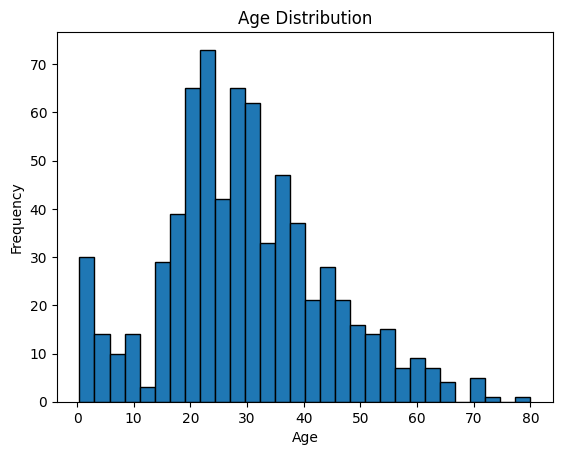

In [43]:
import matplotlib.pyplot as plt

plt.hist(X['age'], bins=30, edgecolor='k')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [44]:
#applying standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['age'] = scaler.fit_transform(X[['age']])
X

,gender,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive,alone,age_binned
0,male,-0.527669,1,0,7.2500,S,Third,man,NaN,Southampton,no,False,Young
1,female,0.577094,1,0,71.2833,C,First,woman,C,Cherbourg,yes,False,Young
2,female,-0.251478,0,0,7.9250,S,Third,woman,NaN,Southampton,yes,True,Young
3,female,0.369951,1,0,53.1000,S,First,woman,C,Southampton,yes,False,Young
4,male,0.369951,0,0,8.0500,S,Third,man,NaN,Southampton,no,True,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,-0.182430,0,0,13.0000,S,Second,man,NaN,Southampton,no,True,Young
887,female,-0.734812,0,0,30.0000,S,First,woman,B,Southampton,yes,True,Teenager
888,female,NaN,1,2,23.4500,S,Third,woman,NaN,Southampton,no,False,NaN
889,male,-0.251478,0,0,30.0000,C,First,man,C,Cherbourg,yes,True,Young
